## Problem 2.

From a clinical trial, we have 12 patients with HIV infection. After treatment, the disease progressed in 6 patients (1) and in 6 patients the infection did not progress (0). Four measurements are taken in the 12 patients (Age, sugar levels, T cell levels, and Cholesterol).

Which measurement can be used as a marker to describe the progression of the disease?

Which will be the criteria to predict the progression?

The data can be found in `problem2.csv (x_age, x_sugar, x_Tcell, x_cholesterol, outcome)`. Arrange the data and briefly explain your results. The variable `y` (target) is a vector of 0 and 1 to represent the progression.

#### A) Importing Libraries

In [2]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#### B) Importing Data

In [4]:
data = pd.read_csv('data/problem2.csv', index_col=0, header=None).T

data

,x_age,x_cholesterol,x_sugar,x_Tcell,y
1,35,220,80,550,0
2,18,240,120,600,0
3,22,260,55,580,0
4,23,220,75,575,0
5,28,180,100,620,0
6,38,280,74,674,0
7,40,235,175,275,1
8,25,200,180,180,1
9,35,150,240,140,1
10,34,280,130,80,1


#### C) Logistic Model Classification

Different models are commented. Please uncomment the model to use.

In [85]:
#model = LogisticRegression(solver='liblinear', random_state=0)
model = []
for i in range(4):
    tmp_model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')
    model.append(tmp_model)

#### D) Spliting the data of Age

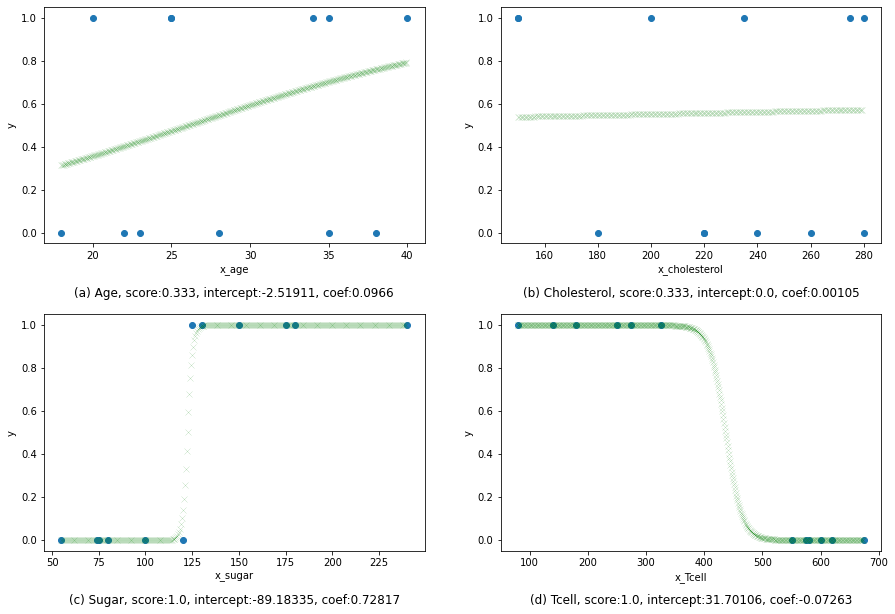

In [95]:
from sklearn.model_selection import train_test_split

x = ['x_age', 'x_cholesterol', 'x_sugar', 'x_Tcell']
title = ['Age', 'Cholesterol', 'Sugar', 'Tcell']

x_cols = []

plt.figure(figsize=(15, 10))

for idx, item in enumerate(x):
    
    plt.subplot(2, 2, idx+1)

    x_col = np.array(data[item]).reshape(-1,1)
    x_cols.append(x_col)
    
    y_col = np.array(data['y'])
    
    x_train, x_test, y_train, y_test = train_test_split(x_col, y_col, test_size=0.2, random_state=5)

    model[idx].fit(x_train, y_train)
    score = model[idx].score(x_test, y_test)

    x_min = x_col.min()
    x_max = x_col.max()
    X = np.arange(x_min, x_max, 1 if x_max - x_min > 500 else .5 if x_max - x_min > 50 else .05)
    X = X.reshape(-1, 1)
    plt.scatter(x_col, y_col)
    plt.scatter(X,model[idx].predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)

    plt.xlabel(item)
    plt.ylabel('y')
    
    intercept = model[idx].intercept_
    coef = model[idx].coef_
    
    plt.title(f'({chr(idx+97)}) {title[idx]}, score:{round(score, 3)}, intercept:{round(intercept[0],5)}, coef:{round(coef[0][0],5)}', y=-.25)
    
plt.subplots_adjust(hspace=.3)
plt.show()

#### G) Confusion Matrix

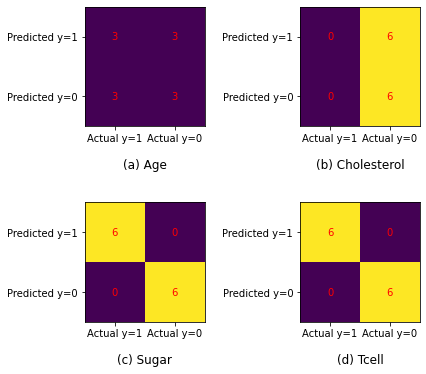

In [147]:

plt.figure(figsize=(6,6))

for idx, item in enumerate(x):
    
    cm = confusion_matrix(y_col, model[idx].predict(x_cols[idx]))
    
    plt.subplot(2, 2, idx+1)
    
    # fig, ax = plt.subplots(figsize=(2, 2))
    plt.imshow(cm)
    plt.grid(False)
    plt.xticks(range(2), ['Actual y=1', 'Actual y=0'])
    plt.yticks(range(2), ['Predicted y=1', 'Predicted y=0'])
    plt.ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.title(f'({chr(idx+97)}) {title[idx]}', y=-.4)
    
plt.subplots_adjust(hspace=.5, wspace=.8)



#### H) ROC Curve

In [150]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

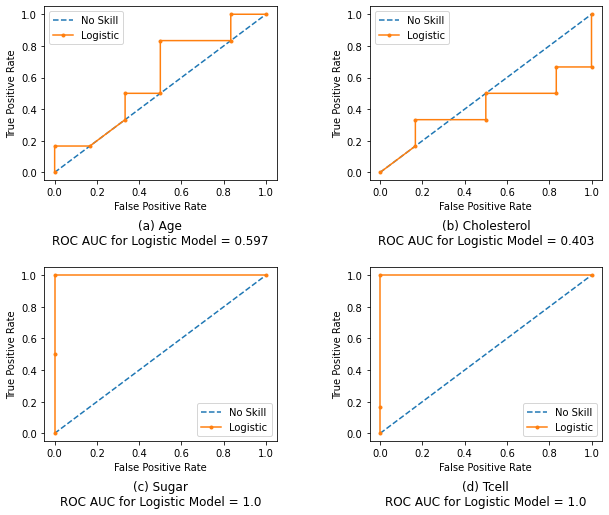

In [160]:
plt.figure(figsize=(10,8))

for idx, item in enumerate(x):
    
    plt.subplot(2, 2, idx+1)
    
    # Genrate a Diagonal(Random Guess)
    ns_probs = [0 for _ in range(len(y_col))]
    
    # predict probabilities
    lr_probs = model[idx].predict_proba(x_cols[idx])
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_col, ns_probs)
    lr_auc = roc_auc_score(y_col, lr_probs)
    
    # summarize scores
    # print('ROC AUC for Logistic Model =%.3f' % (lr_auc))
    
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_col, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_col, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.title(f'({chr(idx+97)}) {title[idx]}\nROC AUC for Logistic Model = {round(lr_auc, 3)}', y=-.4)

plt.subplots_adjust(hspace=.5, wspace=.4)
plt.show()